# LinSShapedMF (Linear S-shaped Membership Function)

The linear S-shaped membership function (`LinSShapedMF`) is a fundamental concept in fuzzy logic, used to define fuzzy sets. Unlike a classical set where an element either fully belongs or doesn't, a fuzzy set allows for partial membership, and the `LinSShapedMF` provides a smooth, continuous way to represent this degree of belonging.

It's a piecewise linear function that transitions from 0 to 1 over a defined interval.

## Parameters

The function is characterized by two main parameters:

- **`a` (start point):** The "left foot" of the curve. This is the point where the membership transition begins from 0.
- **`b` (end point):** The "right shoulder" of the curve. This is the point where the membership reaches and stays at 1. The parameter `b` must always be greater than `a`.


### Mathematical Formula

The mathematical formula for the linear S-shaped membership function is given by:

- $μ(x) = 0$, for $x \le a$
- $μ(x) = (x - a) / (b - a)$, for $a < x < b$
- $μ(x) = 1$, for $x \ge b$

Where:
- $μ(x)$ is the degree of membership for element $x$ in the fuzzy set.
- $a$ and $b$ are the parameters that define the start and end of the linear ramp.

## Partial Derivatives (Gradients)

The partial derivatives of the membership function are crucial for optimization algorithms, such as backpropagation, which allow the system to adapt. They indicate how the membership value changes in response to small adjustments in the parameters `a` and `b`.

### Derivative with respect to `a` ($\frac{\partial \mu}{\partial a}$)

The partial derivative with respect to `a` indicates how the membership value is affected when the starting point of the ramp is adjusted.
> $\frac{\partial \mu}{\partial a} = -\frac{1}{b-a}$ (for the ramp region)

### Derivative with respect to `b` ($\frac{\partial \mu}{\partial b}$)

The partial derivative with respect to `b` shows how the membership value changes when the end point of the ramp is adjusted.
> $\frac{\partial \mu}{\partial b} = \frac{x-a}{(b-a)^2}$ (for the ramp region)

In [ ]:
## Python Example

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Include the full definition of your class here
# (If the class is in another file, you'll need to import it)
class LinSShapedMF:
    # ... complete class code ...
    def __init__(self, a: float, b: float):
        # ...
    def forward(self, x: np.ndarray) -> np.ndarray:
        # ...
    def backward(self, dL_dy: np.ndarray):
        # ...

# Create an instance of the membership function
mf = LinSShapedMF(a=10, b=30)

# Generate a range of x values
x_values = np.linspace(0, 40, 100)

# Calculate the membership values for each x
membership_values = mf.forward(x_values)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(x_values, membership_values, label='LinSShapedMF')
plt.title('Linear S-shaped Membership Function')
plt.xlabel('x')
plt.ylabel('Degree of Membership (μ)')
plt.grid(True)
plt.axvline(mf.parameters['a'], color='r', linestyle='--', label=f'a={mf.parameters["a"]}')
plt.axvline(mf.parameters['b'], color='g', linestyle='--', label=f'b={mf.parameters["b"]}')
plt.legend()
plt.show()

## Visualization

Below is a visual representation of the S-shaped membership function, showing how its shape is influenced by the parameters `a` and `b`.

The graph displays a linear ramp, illustrating how the degree of membership (on the y-axis) changes smoothly for different input values (on the x-axis). The value is 0 before `a`, increases linearly between `a` and `b`, and becomes 1 after `b`.

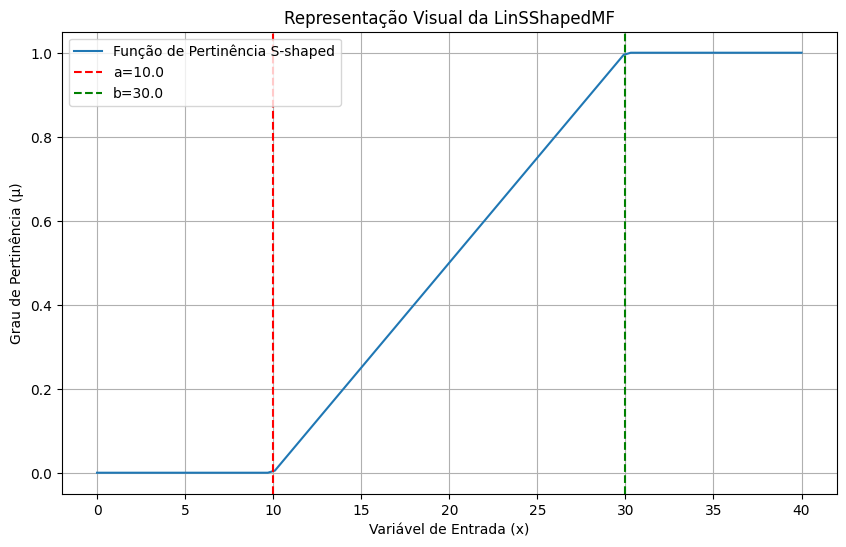

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class LinSShapedMF:
    """Linear S-shaped saturation Membership Function."""
    def __init__(self, a: float, b: float):
        if not (a < b):
            raise ValueError(f"Parameters must satisfy a < b, got a={a}, b={b}")
        self.parameters = {"a": float(a), "b": float(b)}
        self.gradients = {"a": 0.0, "b": 0.0}
        self.last_input = None
        self.last_output = None

    def forward(self, x: np.ndarray) -> np.ndarray:
        x = np.asarray(x, dtype=float)
        self.last_input = x
        a, b = self.parameters["a"], self.parameters["b"]
        y = np.zeros_like(x, dtype=float)
        
        mask_right = x >= b
        y[mask_right] = 1.0
        
        mask_mid = (x > a) & (x < b)
        if np.any(mask_mid):
            y[mask_mid] = (x[mask_mid] - a) / (b - a)
        
        self.last_output = y
        return y

    def backward(self, dL_dy: np.ndarray):
        if self.last_input is None or self.last_output is None:
            return
        x = self.last_input
        dL_dy = np.asarray(dL_dy)
        a, b = self.parameters["a"], self.parameters["b"]
        d = b - a
        if d == 0:
            return
            
        mask = (x > a) & (x < b)
        if not np.any(mask):
            return
            
        xm = x[mask]
        g = dL_dy[mask]
        
        dmu_da = -(1.0 / d) + (xm - a) / (d * d)
        dmu_db = -((xm - a) / (d * d))
        
        self.gradients["a"] += float(np.sum(g * dmu_da))
        self.gradients["b"] += float(np.sum(g * dmu_db))

# --- Início do código para visualização ---

# Crie uma instância da função de pertinência com parâmetros específicos
mf = LinSShapedMF(a=10, b=30)

# Gere um intervalo de valores x para o gráfico
x_values = np.linspace(0, 40, 100)

# Calcule os valores de pertinência (y) para cada x
membership_values = mf.forward(x_values)

# Configure e plote o gráfico
plt.figure(figsize=(10, 6))
plt.plot(x_values, membership_values, label='Função de Pertinência S-shaped')

# Adicione linhas verticais para os parâmetros 'a' e 'b'
plt.axvline(mf.parameters['a'], color='r', linestyle='--', label=f'a={mf.parameters["a"]}')
plt.axvline(mf.parameters['b'], color='g', linestyle='--', label=f'b={mf.parameters["b"]}')

# Adicione rótulos e título
plt.title('Representação Visual da LinSShapedMF')
plt.xlabel('Variável de Entrada (x)')
plt.ylabel('Grau de Pertinência (μ)')
plt.legend()
plt.grid(True)
plt.show()